In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json


In [5]:
! kaggle datasets download -d jessicali9530/stl10

100% 1.88G/1.88G [00:22<00:00, 54.2MB/s]
100% 1.88G/1.88G [00:22<00:00, 89.0MB/s]


In [6]:
! kaggle datasets download -d pratt3000/stl10-binary-files

100% 2.43G/2.44G [01:01<00:00, 33.1MB/s]
100% 2.44G/2.44G [01:01<00:00, 42.5MB/s]


In [7]:
! unzip stl10.zip
! unzip stl10-binary-files.zip

Streaming output truncated to the last 5000 lines.
  inflating: unlabeled_images/unlabeled_image_png_95505.png  
  inflating: unlabeled_images/unlabeled_image_png_95506.png  
  inflating: unlabeled_images/unlabeled_image_png_95507.png  
  inflating: unlabeled_images/unlabeled_image_png_95508.png  
  inflating: unlabeled_images/unlabeled_image_png_95509.png  
  inflating: unlabeled_images/unlabeled_image_png_9551.png  
  inflating: unlabeled_images/unlabeled_image_png_95510.png  
  inflating: unlabeled_images/unlabeled_image_png_95511.png  
  inflating: unlabeled_images/unlabeled_image_png_95512.png  
  inflating: unlabeled_images/unlabeled_image_png_95513.png  
  inflating: unlabeled_images/unlabeled_image_png_95514.png  
  inflating: unlabeled_images/unlabeled_image_png_95515.png  
  inflating: unlabeled_images/unlabeled_image_png_95516.png  
  inflating: unlabeled_images/unlabeled_image_png_95517.png  
  inflating: unlabeled_images/unlabeled_image_png_95518.png  
  inflating: unlabel

In [8]:
! pip install kaggle
! mkdir ~/.kaggle
!cp drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'drive/MyDrive/kaggle.json': No such file or directory


In [9]:
!ls

kaggle.json  stl10_binary	     stl10.zip	  train_images
sample_data  stl10-binary-files.zip  test_images  unlabeled_images


In [10]:
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from imageio import imsave
from tqdm import tqdm
import random
import shutil

HEIGHT = 96
WIDTH = 96
DEPTH = 3

SIZE = HEIGHT * WIDTH * DEPTH

DATA_DIR = './'
# DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

TRAIN_DATA_PATH = '/content/stl10_binary/train_X.bin'
TRAIN_LABEL_PATH = '/content/stl10_binary/train_y.bin'

TEST_DATA_PATH = '/content/stl10_binary/test_X.bin'
TEST_LABEL_PATH = '/content/stl10_binary/test_y.bin'

UNLAB_DATA_PATH = '/content/stl10_binary/unlabeled_X.bin'

In [11]:
def read_single_image(image_file):

  image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)

  image = np.reshape(image, (3, 96, 96))
  image = np.transpose(image, (2, 1, 0))
  return image

def plot_image(image):
  
  plt.imshow(image)
  plt.show()

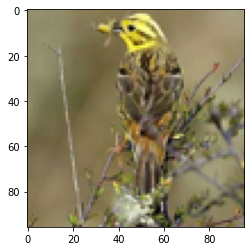

In [12]:
with open(TRAIN_DATA_PATH) as f:
  image = read_single_image(f)
  plot_image(image)

In [13]:
def read_labels(path_to_labels):

    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

def read_all_images(path_to_data):

    with open(path_to_data, 'rb') as f:
        everything = np.fromfile(f, dtype=np.uint8)

        images = np.reshape(everything, (-1, 3, 96, 96))
        images = np.transpose(images, (0, 3, 2, 1))
        return images

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def save_images(images, labels, types):
    i = 0
    for image in tqdm(images, position=0):
        label = labels[i] 
        directory = DATA_DIR + '/' + types + '/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        #print(filename)
        save_image(image, filename)
        i = i+1
        
def save_unlabelled_images(images):
    i = 0
    for image in tqdm(images, position=0):
        directory = DATA_DIR + '/' + 'unlabelled' + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        save_image(image, filename)
        i = i+1 
        

def create_val_dataset():
    train_image_path = DATA_DIR + "train"
    folders = os.listdir(train_image_path)

    for folder in tqdm(folders, position=0):
        temp_dir = DATA_DIR +"/train/" + folder
        temp_image_list = os.listdir(temp_dir)

    for i in range(50):
        val_dir = DATA_DIR + "/val/" + folder
        try:
            os.makedirs(val_dir, exist_ok=True)
        except OSError as exc:

            if exc.errno == errno.EEXIST:
                pass
        image_name = random.choice(temp_image_list)
        temp_image_list.remove(image_name)
        old_name = temp_dir + '/' + image_name
        new_name = val_dir + '/' + image_name
        os.replace(old_name, new_name)

In [14]:
train_labels = read_labels(TRAIN_LABEL_PATH)
train_images = read_all_images(TRAIN_DATA_PATH)

test_labels = read_labels(TEST_LABEL_PATH)
test_images = read_all_images(TEST_DATA_PATH)

unlabelled_images = read_all_images(UNLAB_DATA_PATH)

In [15]:
save_images(train_images, train_labels, "train")
save_images(test_images, test_labels, "test")
save_unlabelled_images(unlabelled_images)

100%|██████████| 100000/100000 [06:10<00:00, 270.15it/s]


In [ ]:
def str2bool(v):
    if v.lower() in ['true', 1]:
        return True
    elif v.lower() in ['false', 0]:
        return False
    else:
        raise argparse.ArgumentTypeError('Boolean value expected.')

ShearX


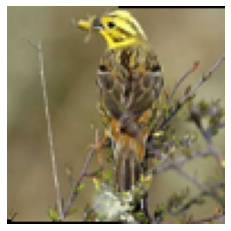

ShearY


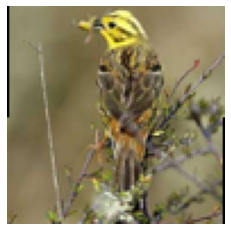

TranslateX


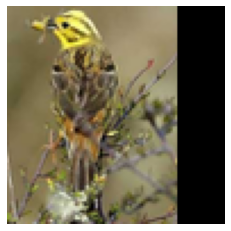

TranslateY


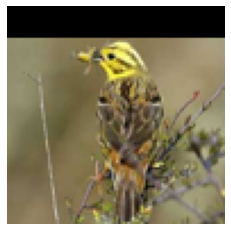

Rotate


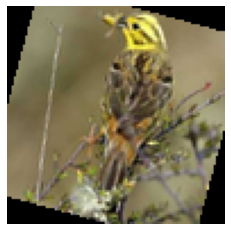

AutoContrast


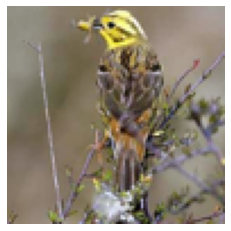

Invert


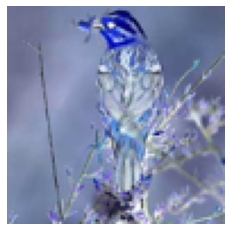

Equalize


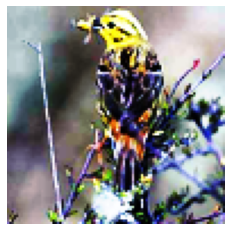

Solarize


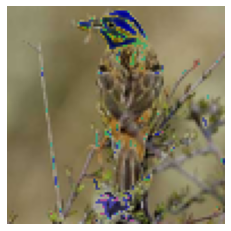

Posterize


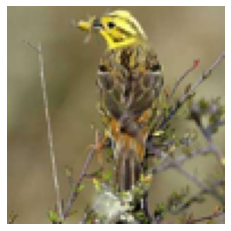

Contrast


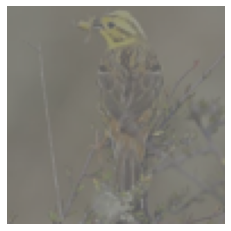

Color


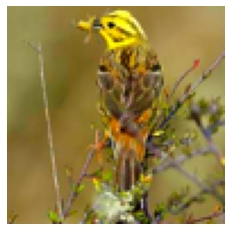

Brightness


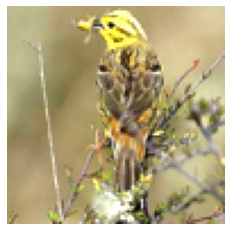

Sharpness


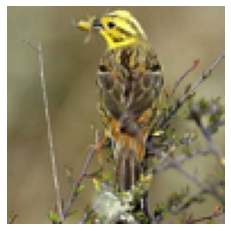

Cutout


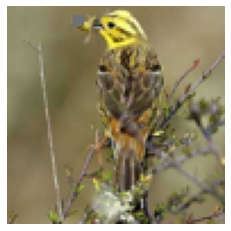

In [17]:
import random
import numpy as np
import scipy
from scipy import ndimage
from PIL import Image, ImageEnhance, ImageOps


operations = {
    'ShearX': lambda img, magnitude: shear_x(img, magnitude),
    'ShearY': lambda img, magnitude: shear_y(img, magnitude),
    'TranslateX': lambda img, magnitude: translate_x(img, magnitude),
    'TranslateY': lambda img, magnitude: translate_y(img, magnitude),
    'Rotate': lambda img, magnitude: rotate(img, magnitude),
    'AutoContrast': lambda img, magnitude: auto_contrast(img, magnitude),
    'Invert': lambda img, magnitude: invert(img, magnitude),
    'Equalize': lambda img, magnitude: equalize(img, magnitude),
    'Solarize': lambda img, magnitude: solarize(img, magnitude),
    'Posterize': lambda img, magnitude: posterize(img, magnitude),
    'Contrast': lambda img, magnitude: contrast(img, magnitude),
    'Color': lambda img, magnitude: color(img, magnitude),
    'Brightness': lambda img, magnitude: brightness(img, magnitude),
    'Sharpness': lambda img, magnitude: sharpness(img, magnitude),
    'Cutout': lambda img, magnitude: cutout(img, magnitude),
}


def apply_policy(img, policy):
    if random.random() < policy[1]:
        img = operations[policy[0]](img, policy[2])
    if random.random() < policy[4]:
        img = operations[policy[3]](img, policy[5])

    return img


def transform_matrix_offset_center(matrix, x, y):
    o_x = float(x) / 2 + 0.5
    o_y = float(y) / 2 + 0.5
    offset_matrix = np.array([[1, 0, o_x], [0, 1, o_y], [0, 0, 1]])
    reset_matrix = np.array([[1, 0, -o_x], [0, 1, -o_y], [0, 0, 1]])
    transform_matrix = offset_matrix @ matrix @ reset_matrix
    return transform_matrix


def shear_x(img, magnitude):
    magnitudes = np.linspace(-0.3, 0.3, 11)

    transform_matrix = np.array([[1, random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]), 0],
                                 [0, 1, 0],
                                 [0, 0, 1]])
    transform_matrix = transform_matrix_offset_center(transform_matrix, img.shape[0], img.shape[1])
    affine_matrix = transform_matrix[:2, :2]
    offset = transform_matrix[:2, 2]
    img = np.stack([ndimage.interpolation.affine_transform(
                    img[:, :, c],
                    affine_matrix,
                    offset) for c in range(img.shape[2])], axis=2)
    return img


def shear_y(img, magnitude):
    magnitudes = np.linspace(-0.3, 0.3, 11)

    transform_matrix = np.array([[1, 0, 0],
                                 [random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]), 1, 0],
                                 [0, 0, 1]])
    transform_matrix = transform_matrix_offset_center(transform_matrix, img.shape[0], img.shape[1])
    affine_matrix = transform_matrix[:2, :2]
    offset = transform_matrix[:2, 2]
    img = np.stack([ndimage.interpolation.affine_transform(
                    img[:, :, c],
                    affine_matrix,
                    offset) for c in range(img.shape[2])], axis=2)
    return img


def translate_x(img, magnitude):
    magnitudes = np.linspace(-150/331, 150/331, 11)

    transform_matrix = np.array([[1, 0, 0],
                                 [0, 1, img.shape[1]*random.uniform(magnitudes[magnitude], magnitudes[magnitude+1])],
                                 [0, 0, 1]])
    transform_matrix = transform_matrix_offset_center(transform_matrix, img.shape[0], img.shape[1])
    affine_matrix = transform_matrix[:2, :2]
    offset = transform_matrix[:2, 2]
    img = np.stack([ndimage.interpolation.affine_transform(
                    img[:, :, c],
                    affine_matrix,
                    offset) for c in range(img.shape[2])], axis=2)
    return img


def translate_y(img, magnitude):
    magnitudes = np.linspace(-150/331, 150/331, 11)

    transform_matrix = np.array([[1, 0, img.shape[0]*random.uniform(magnitudes[magnitude], magnitudes[magnitude+1])],
                                 [0, 1, 0],
                                 [0, 0, 1]])
    transform_matrix = transform_matrix_offset_center(transform_matrix, img.shape[0], img.shape[1])
    affine_matrix = transform_matrix[:2, :2]
    offset = transform_matrix[:2, 2]
    img = np.stack([ndimage.interpolation.affine_transform(
                    img[:, :, c],
                    affine_matrix,
                    offset) for c in range(img.shape[2])], axis=2)
    return img


def rotate(img, magnitude):
    magnitudes = np.linspace(-30, 30, 11)

    theta = np.deg2rad(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    transform_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                 [np.sin(theta), np.cos(theta), 0],
                                 [0, 0, 1]])
    transform_matrix = transform_matrix_offset_center(transform_matrix, img.shape[0], img.shape[1])
    affine_matrix = transform_matrix[:2, :2]
    offset = transform_matrix[:2, 2]
    img = np.stack([ndimage.interpolation.affine_transform(
                    img[:, :, c],
                    affine_matrix,
                    offset) for c in range(img.shape[2])], axis=2)
    return img


def auto_contrast(img, magnitude):
    img = Image.fromarray(img)
    img = ImageOps.autocontrast(img)
    img = np.array(img)
    return img


def invert(img, magnitude):
    img = Image.fromarray(img)
    img = ImageOps.invert(img)
    img = np.array(img)
    return img


def equalize(img, magnitude):
    img = Image.fromarray(img)
    img = ImageOps.equalize(img)
    img = np.array(img)
    return img


def solarize(img, magnitude):
    magnitudes = np.linspace(0, 256, 11)

    img = Image.fromarray(img)
    img = ImageOps.solarize(img, random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    img = np.array(img)
    return img


def posterize(img, magnitude):
    magnitudes = np.linspace(4, 8, 11)

    img = Image.fromarray(img)
    img = ImageOps.posterize(img, int(round(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))))
    img = np.array(img)
    return img


def contrast(img, magnitude):
    magnitudes = np.linspace(0.1, 1.9, 11)

    img = Image.fromarray(img)
    img = ImageEnhance.Contrast(img).enhance(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    img = np.array(img)
    return img


def color(img, magnitude):
    magnitudes = np.linspace(0.1, 1.9, 11)

    img = Image.fromarray(img)
    img = ImageEnhance.Color(img).enhance(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    img = np.array(img)
    return img


def brightness(img, magnitude):
    magnitudes = np.linspace(0.1, 1.9, 11)

    img = Image.fromarray(img)
    img = ImageEnhance.Brightness(img).enhance(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    img = np.array(img)
    return img


def sharpness(img, magnitude):
    magnitudes = np.linspace(0.1, 1.9, 11)

    img = Image.fromarray(img)
    img = ImageEnhance.Sharpness(img).enhance(random.uniform(magnitudes[magnitude], magnitudes[magnitude+1]))
    img = np.array(img)
    return img


def cutout(org_img, magnitude=None):
    magnitudes = np.linspace(0, 60/331, 11)

    img = np.copy(org_img)
    mask_val = img.mean()

    if magnitude is None:
        mask_size = 16
    else:
        mask_size = int(round(img.shape[0]*random.uniform(magnitudes[magnitude], magnitudes[magnitude+1])))
    top = np.random.randint(0 - mask_size//2, img.shape[0] - mask_size)
    left = np.random.randint(0 - mask_size//2, img.shape[1] - mask_size)
    bottom = top + mask_size
    right = left + mask_size

    if top < 0:
        top = 0
    if left < 0:
        left = 0

    img[top:bottom, left:right, :].fill(mask_val)

    return img


def main():
    import matplotlib.pyplot as plt
    from keras.datasets import cifar10

    x_train = train_images
    y_train = train_labels
    x_test = test_images
    y_test = test_labels

    img = x_train[0]
    for key, op in zip(operations.keys(), operations.values()):
        print(key)
        dst = op(img, random.randint(0, 9))
        plt.imshow(dst)
        plt.axis('off')
        plt.show()


if __name__ == '__main__':
    main()

Note: Semi-Supervised task not completed using AutoAugment

In [ ]:
import keras
from keras import layers
image_size = 96
image_channels = 3
width = 128
def get_encoder():
    return keras.Sequential(
        [
            keras.Input(shape=(image_size, image_size, image_channels)),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Flatten(),
            layers.Dense(width, activation="relu"),
        ],
        name="encoder",
    )
model = keras.Sequential(
    [
        keras.Input(shape=(image_size, image_size, image_channels)),
#         get_augmenter(**classification_augmentation),
        get_encoder(),
        keras.layers.Dense(11),
    ],
    name="baseline_model",
)
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

baseline_history = model.fit(
    x=train_images, y=train_labels, epochs=10, validation_data=(test_images, test_labels)
)


Pseudo-labelling 

In [ ]:
import tensorflow as tf 
import numpy as np
epoch = 30
batch_size = 100
threshold = 0.6
steps = int(unlabelled_images.shape[0]/batch_size)
for idx in range(steps):
        #predicting class
        pseudo_labels = model.predict(unlabelled_images, batch_size=100)
        #taking max and checking for threshold
        pseudo_labels = np.array( [ np.argmax(x) if np.max(x) > threshold else -1 for x in pseudo_labels])
        #zipping their labels and images
        dataset = np.array( [ [x,y] for x,y in zip( unlabelled_images, pseudo_labels ) if y != -1 ])
        x_values = np.array( [x for x,y in dataset ])
        y_values = np.array( [y for x,y in dataset ])
        print("3")

        pseudo_dataset = tf.data.Dataset.from_tensor_slices((x_values, y_values ))
        pseudo_dataset = pseudo_dataset.shuffle(1000).batch(batch_size)

print("4")
#         model.fit(pseudo_dataset, batch_size=1, epochs=1, verbose=0)
#fine tuning
#         model.fit(x=train_images, y=train_labels, batch_size=100, epochs=1, verbose=0, validation_data = (test_images, test_labels))


In [ ]:

model.fit(pseudo_dataset, batch_size=10, epochs=3)

In [ ]:
model.fit(x=train_images, y=train_labels, epochs=10, validation_data=(test_images, test_labels))